# Importing necessary liabraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Loading the Dataset

In [48]:
dd = pd.read_csv('retail_sales_dataset.csv')
np.random.seed(0)

# Exploratory Data Analysis

Checking total Rows and Columns

In [49]:
dd.shape

(1000, 9)

In [50]:
dd.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [51]:
dd.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


Copy the dataset 

In [52]:
data = dd.copy()

*Checking for null values in each columns*

In [53]:
print(data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


*Changing date format Y-M-D to D-M-Y*

In [54]:
print(data['Date'].head())

0    2023-11-24
1    2023-02-27
2    2023-01-13
3    2023-05-21
4    2023-05-06
Name: Date, dtype: object


In [55]:
data['Date_parsed'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Date'] = data['Date_parsed'].dt.strftime('%d-%m-%Y')
print(data['Date_parsed'].head())

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date_parsed, dtype: datetime64[ns]


C:\Users\Owner\AppData\Local\Temp\ipykernel_13528\401818501.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date_parsed'] = pd.to_datetime(data['Date'], dayfirst=True)


*Monthly sales distribution*

In [56]:
month = data['Date_parsed'].dt.month
month.head()

0    11
1     2
2     1
3     5
4     5
Name: Date_parsed, dtype: int32

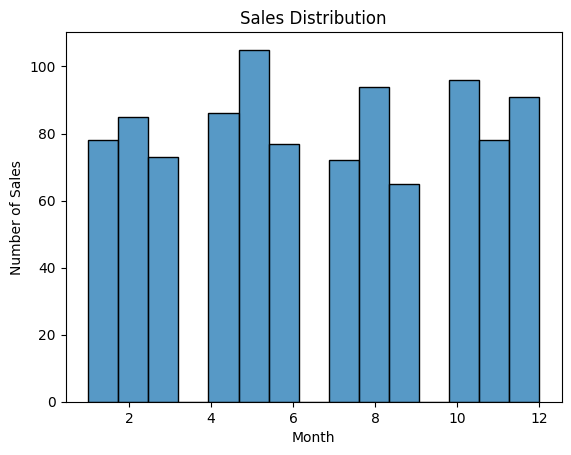

In [57]:
sns.histplot(month, kde=False, bins=15)
plt.title("Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

*Total Amount*

In [58]:
data['Total Amount'].sum()

np.int64(456000)

*Total Sales*

In [59]:
data['Quantity'].sum()

np.int64(2514)

*Gender Distribution*

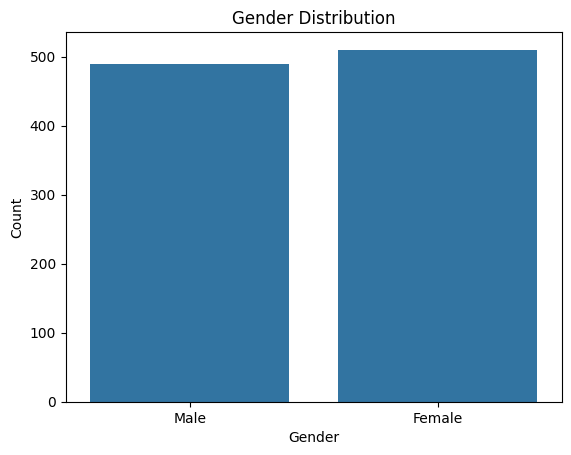

In [60]:
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

*Age Distribution*

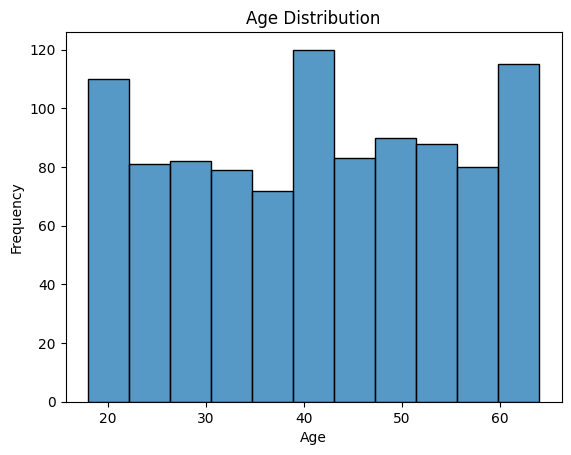

In [61]:
sns.histplot(x='Age', data=data)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [62]:
print(data['Product Category'].unique())

['Beauty' 'Clothing' 'Electronics']


In [63]:
data['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

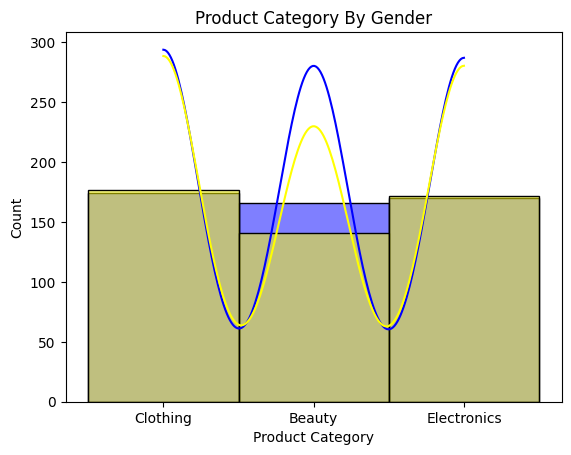

In [64]:
data_female = data[data['Gender'] == 'Female']
data_Male = data[data['Gender'] == 'Male']
sns.histplot(data=data_female, x='Product Category', color='blue', label='Female', kde=True,bins=30)
sns.histplot(data=data_Male, x='Product Category', color='yellow', label='Male', kde=True,bins=30)
plt.title('Product Category By Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

*Electronics are more bought by male than female*

*Beauty products are more bought by female than male*

*Clothing are evnely bought by both male and female*

*Maximum Sales happend in the month of MAY*

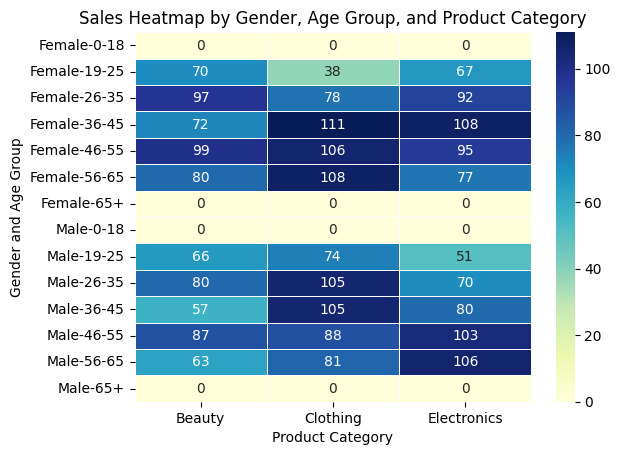

In [65]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

pivot_data = data.groupby(['Gender', 'Age Group', 'Product Category'], observed=False)['Quantity'].sum().unstack(fill_value=0)
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title("Sales Heatmap by Gender, Age Group, and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Gender and Age Group")
plt.show()

*Female buyers of age 30+ more shop for clothing.*

*Female buyers of age 25-35 more shop for beauty.*

*Male buyers of age 50+ more shop for electronics.*

*Male buyers of age 30-45 more shop for clothing.*

*Descriptive Statistics*

In [66]:
mean_total = data['Total Amount'].mean()
print(f"Mean of Total Amount: {mean_total}")

Mean of Total Amount: 456.0


In [67]:
mode_total = data['Total Amount'].mode()[0]
print(f"Mode of Total Amount: {mode_total}")

Mode of Total Amount: 50


In [68]:
median_total = data['Total Amount'].median()
print(f"Median of Total Amount: {median_total}")

Median of Total Amount: 135.0


In [69]:
std_total = data['Total Amount'].std()
print(f"Standard Deviation of Total Amount: {std_total}")

Standard Deviation of Total Amount: 559.997631555123
